In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_prediction_dataset.csv")
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.shape

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.nunique()

In [ ]:
df.describe()

In [ ]:
df.columns

In [3]:
column_remove =["date","city","statezip","country","street"]
df = df.drop(column_remove,axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


Finding correlation

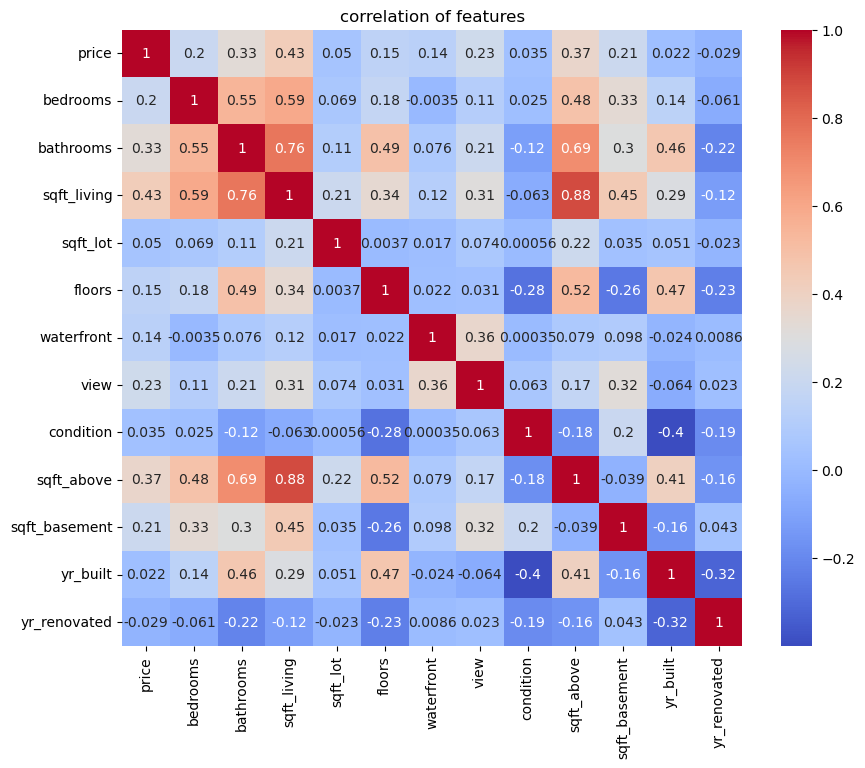

In [4]:
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap="coolwarm")
plt.title("correlation of features")
plt.show()

Identifying outliers

In [5]:
import scipy.stats as stats # measure sd between the numbers 

In [6]:
z_score = stats.zscore(df)
threshold = 3
print("size before removing outliers",df.shape)
outliers_df = df[(z_score>threshold).any(axis=1)]
df = df[(z_score <= threshold).all(axis=1)]
print("size after removing outliers",df.shape)

size before removing outliers (4600, 13)
size after removing outliers (4244, 13)


In [ ]:
outliers_df.head(5)

Preprocessing (normalization/standardization)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
df_scaled = pd.DataFrame(scaler.transform(df),columns = df.columns)
df_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.696687,-0.407382,-0.837743,-0.863761,-0.209100,-0.001538,0.0,-0.233255,-0.667592,-0.536342,-0.678636,-0.522372,1.221112
1,-0.587877,-0.407382,-0.125527,-0.109446,0.109953,-0.934006,0.0,-0.233255,0.812691,0.251285,-0.678636,-0.153713,-0.826230
2,-0.295216,-0.407382,0.230581,-0.019951,-0.199769,-0.934006,0.0,-0.233255,0.812691,-0.990229,1.799597,-0.254256,-0.826230
3,0.192553,0.760814,0.586688,-0.096661,-0.004463,-0.934006,0.0,-0.233255,0.812691,-0.803335,1.303950,0.181431,1.207838
4,-0.032571,-1.575578,-1.549958,-1.451871,-0.330237,-0.934006,0.0,-0.233255,-0.667592,-1.150425,-0.678636,-1.092117,1.209880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,-0.714822,-0.407382,-0.481635,-0.646416,-0.331818,-0.934006,0.0,-0.233255,0.812691,-0.309399,-0.678636,-0.555886,1.194563
4240,0.133770,-0.407382,0.586688,-0.710341,-0.235905,0.930930,0.0,-0.233255,-0.667592,-0.376147,-0.678636,0.416032,1.225197
4241,-0.306832,-0.407382,0.586688,1.271335,-0.280106,0.930930,0.0,-0.233255,-0.667592,1.693043,-0.678636,1.287408,-0.826230
4242,-1.107914,0.760814,-0.125527,0.095114,-0.310469,-0.934006,0.0,-0.233255,-0.667592,-0.896782,1.849161,0.114402,-0.826230


Applying model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
x = df.drop("price",axis = 1)
y = df["price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 42 )

In [14]:
print("x train data : ",x_train.shape)
print("x test data : ",x_test.shape)
print("y train data : ",y_train.shape)
print("y test data : ",y_test.shape)

x train data :  (3183, 12)
x test data :  (1061, 12)
y train data :  (3183,)
y test data :  (1061,)


In [15]:
models = [("random_forest",RandomForestRegressor()),
         ("Decision_Tree",DecisionTreeRegressor()),
         ("Linear_Regression",LinearRegression()),
         ("K_Neighbors",KNeighborsRegressor())]

In [19]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [20]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    y_prediction = model.predict(x_test)
    print("mean squared error ",mean_squared_error(y_test,y_prediction))
    print("r2 score ",r2_score(y_test,y_prediction))
    print("mean absolute error ",mean_absolute_error(y_test,y_prediction))
    print()

random_forest
mean squared error  44881087408.33548
r2 score  0.3982438485325235
mean absolute error  142509.2963431049

Decision_Tree
mean squared error  72629757125.61266
r2 score  0.02619553906331884
mean absolute error  183576.8288516494

Linear_Regression
mean squared error  41194540563.18198
r2 score  0.4476722908864431
mean absolute error  139530.23333713802

K_Neighbors
mean squared error  50921279885.92522
r2 score  0.31725822208439636
mean absolute error  154545.94578497644

